<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/task_1_dynx__%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Imports & version check
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
# Step 2: Load dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape:", X_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("X_test shape:", X_test.shape)     # (10000, 28, 28)
print("y_test shape:", y_test.shape)     # (10000,)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# Step 3: Preprocess
# Keep original test images for plotting later
X_test_orig = X_test.copy()

# Normalize to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images: (28,28) -> (784,)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print("After preprocessing:")
print("X_train shape:", X_train.shape)   # (60000, 784)
print("X_test shape:", X_test.shape)     # (10000, 784)


After preprocessing:
X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [4]:
# Step 4: Build model
model = models.Sequential([
    layers.Input(shape=(784,)),            # input vector of length 784
    layers.Dense(128, activation='relu'), # hidden layer 1 (128 neurons)
    layers.Dense(64, activation='relu'),  # hidden layer 2 (64 neurons)
    layers.Dense(10, activation='softmax')# output (10 classes: digits 0-9)
])

# Compile model: optimizer, loss, metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Train
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    verbose=2)  # verbose=2 gives compact logs


Epoch 1/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9237 - loss: 0.2614 - val_accuracy: 0.9690 - val_loss: 0.1105
Epoch 2/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9658 - loss: 0.1124 - val_accuracy: 0.9728 - val_loss: 0.0907
Epoch 3/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9761 - loss: 0.0776 - val_accuracy: 0.9745 - val_loss: 0.0814
Epoch 4/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9819 - loss: 0.0573 - val_accuracy: 0.9787 - val_loss: 0.0741
Epoch 5/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9742 - val_loss: 0.0889
Epoch 6/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9788 - val_loss: 0.0783
Epoch 7/10
1688/1688 - 11s - 6ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9815 - val_loss: 0.0742
Epoch 8/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9740 - val_loss: 0.0977
Epoch 9/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9925 - loss: 0.0216 - val_accuracy: 0.9790 -

In [6]:
# Step 6: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9754 - loss: 0.1081
Test loss: 0.1081
Test accuracy: 0.9754


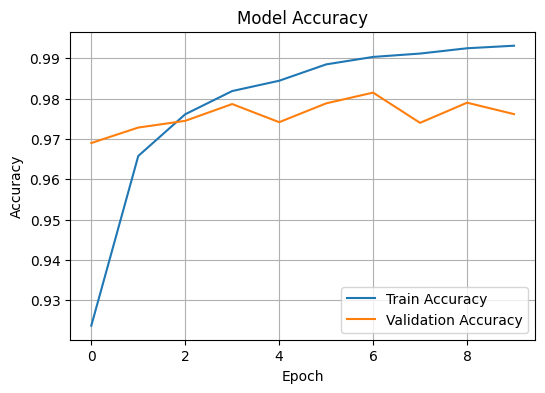

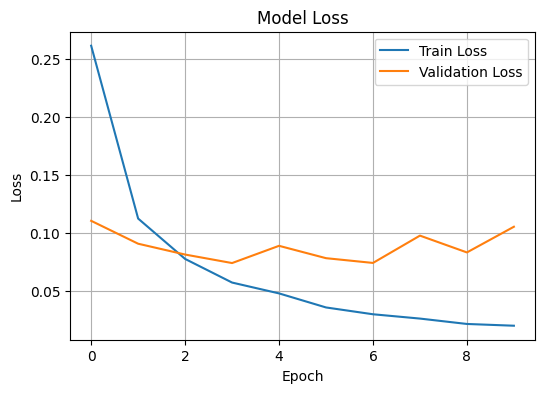

In [7]:
# Step 7: Accuracy & Loss plots
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted labels:
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
Actual labels:   
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


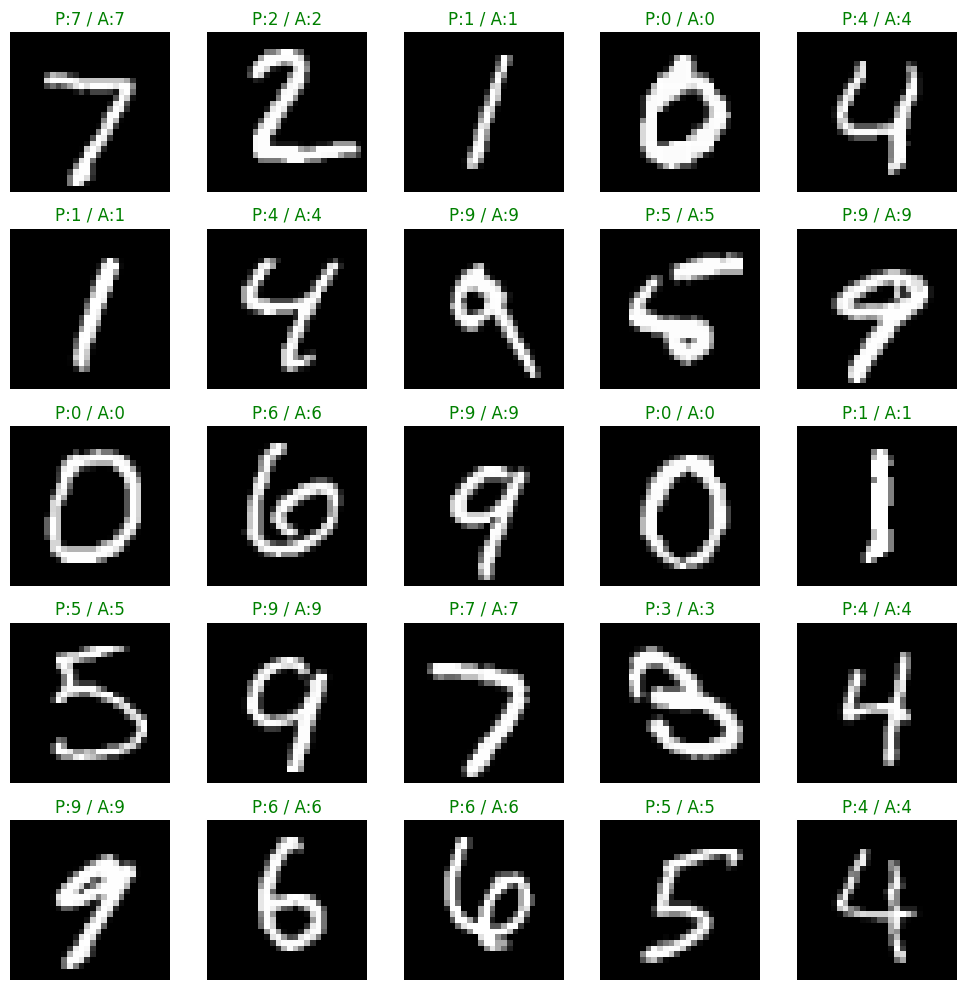

In [8]:
# Step 8: Sample predictions (first 25 test images)
num_samples = 25
pred_probs = model.predict(X_test[:num_samples])   # probabilities
pred_labels = np.argmax(pred_probs, axis=1)

print("Predicted labels:\n", pred_labels)
print("Actual labels:   \n", y_test[:num_samples])

# Plot images with predicted and actual labels
plt.figure(figsize=(10,10))
for i in range(num_samples):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(X_test_orig[i], cmap='gray')  # original 28x28 image
    color = 'green' if pred_labels[i] == y_test[i] else 'red'
    plt.title(f"P:{pred_labels[i]} / A:{y_test[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
